# AF3214
# Week 8. Introduction to Risk Measures and Measuring Algorithms Performance
# Part 2: Efficient Frontier

# Efficient Frontier

Review of efficient frontier:

The efficient frontier is the set of optimal portfolios that either:

(1) offer the highest expected return for a given level of risk

OR 

(2) offer the lowest risk for a given level of expected return.

Using the portfolio of Apple and Amazon, we will look for the optimal weights with the highest sharpe ratio.

We will use the expected returns and we will simulate 6000 different weight scenarios, and then we will plot out the Efficient frontier.

In [7]:
# Import pandas and numpy
import pandas as pd
import numpy as np

In [8]:
# Create an empty dictionary. We name it as "stock_data"
stock_data = {}

In [9]:
from alpha_vantage.timeseries import TimeSeries
import time

# If you want to download the data please use your alpha vantage key
ts = TimeSeries(key='Input Your Key', output_format='pandas')

tickers = ['AAPL','AMZN']

for ticker in tickers: 
    filename = ticker + '.csv'
    data, meta_data = ts.get_daily(symbol= ticker , outputsize='full')
    stock_data[ticker] = data
    data.to_csv(filename)
    time.sleep(5)  

In [10]:
stock_data

{'AAPL':             1. open   2. high    3. low  4. close   5. volume
 date                                                         
 2025-04-24  204.890  208.8299  202.9400    208.37  47310989.0
 2025-04-23  206.000  208.0000  202.7990    204.60  52929165.0
 2025-04-22  196.120  201.5900  195.9700    199.74  52976371.0
 2025-04-21  193.265  193.8000  189.8112    193.16  46742537.0
 2025-04-17  197.200  198.8335  194.4200    196.98  52164675.0
 ...             ...       ...       ...       ...         ...
 1999-11-05   84.620   88.3700   84.0000     88.31   3721500.0
 1999-11-04   82.060   85.3700   80.6200     83.62   3384700.0
 1999-11-03   81.620   83.2500   81.0000     81.50   2932700.0
 1999-11-02   78.000   81.6900   77.3100     80.25   3564600.0
 1999-11-01   80.000   80.6900   77.3700     77.62   2487300.0
 
 [6409 rows x 5 columns],
 'AMZN':             1. open  2. high   3. low  4. close   5. volume
 date                                                       
 2025-04-24  18

In [11]:
stock_final_data = pd.DataFrame()
for ticker in tickers:
    # Ensure the index is sorted before slicing
    stock_data[ticker] = stock_data[ticker].sort_index()
    stock_final_data[ticker] = stock_data[ticker].loc[:'2024', '4. close']

In [12]:
stock_final_data

,AAPL,AMZN
date,,
1999-11-01,77.62,69.13
1999-11-02,80.25,66.44
1999-11-03,81.50,65.81
1999-11-04,83.62,63.06
1999-11-05,88.31,64.94
...,...,...
2024-12-24,258.20,229.05
2024-12-26,259.02,227.05
2024-12-27,255.59,223.75


In [13]:
stock_final_data = stock_final_data.sort_values(by='date')
stock_log_ret = np.log(stock_final_data) - np.log(stock_final_data.shift(1))
stock_log_ret = stock_log_ret.drop(stock_log_ret.index[0])

In [14]:
stock_log_ret

,AAPL,AMZN
date,,
1999-11-02,0.033322,-0.039690
1999-11-03,0.015456,-0.009527
1999-11-04,0.025680,-0.042685
1999-11-05,0.054571,0.029377
1999-11-08,0.087342,0.183245
...,...,...
2024-12-24,0.011413,0.017573
2024-12-26,0.003171,-0.008770
2024-12-27,-0.013331,-0.014641


## Begin to Set Up

## Set Up 1:  Set up empty numpy arrays for weights, raturns, volatility, and sharpe ratio

We need to use the "zeros" function in Numpy

In [15]:
# sim_ports: we set up the amount of portfolios that will be simulated; you can change this to a smaller or larger number
sim_ports = 6000

# We will initialize some empty numpy arrays
# np.zeros: Return a new array of given shape and type, filled with zeros.
weights_of_stocks = np.zeros((sim_ports, len(tickers)), dtype=np.float64)

return_array = np.zeros(sim_ports, dtype=np.float64)
volatility_array = np.zeros(sim_ports, dtype=np.float64)
sharpe_array = np.zeros(sim_ports, dtype=np.float64)

In [16]:
type(weights_of_stocks)

numpy.ndarray

In [17]:
weights_of_stocks

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], shape=(6000, 2))

## Set Up 2: Set up simulation

In [18]:
# Now we will simulate all portfolios and their returns

for x in range(sim_ports):
    # Set up a specific seed for each loop (we are setting a seed so the results can be replicated.)
    np.random.seed(x)
    
    # Create random weights
    weights = np.array(np.random.random(2))
    print(weights)
    
    weights = weights/np.sum(weights)
    print(weights)
    
    # Save Weights to our array
    weights_of_stocks[x,:] = weights
    print(weights_of_stocks)
    
    # Calculating the expected return for the portfolio
    return_array[x] = ((np.sum(stock_log_ret.mean() * weights)))*252
    
    # Calculating the Volatility
    volatility_array[x] = np.sqrt(np.dot(weights.T, np.dot(stock_log_ret.cov()*252, weights)))
    
    # Caclulating Sharpe Ratio (assume risk-free rate=0)
    sharpe_array[x] = (return_array[x]-0)/volatility_array[x]
    print(sharpe_array[x])

[0.5488135  0.71518937]
[0.43418691 0.56581309]
[[0.43418691 0.56581309]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
0.08391223984344463
[0.417022   0.72032449]
[0.36666223 0.63333777]
[[0.43418691 0.56581309]
 [0.36666223 0.63333777]
 [0.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
0.08073064046607868
[0.4359949  0.02592623]
[0.94387303 0.05612697]
[[0.43418691 0.56581309]
 [0.36666223 0.63333777]
 [0.94387303 0.05612697]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
0.07559033559643906
[0.5507979  0.70814782]
[0.43750727 0.56249273]
[[0.43418691 0.56581309]
 [0.36666223 0.63333777]
 [0.94387303 0.05612697]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]
0.08404984574619578
[0.96702984 0.54723225]
[0.63861457 0.36138543]
[[0.43418691 0.56581309]
 [0.36666223 0.63333777]
 [0.94

In [19]:
print('Max Sharpe Ratio is: {}'.format(sharpe_array.max()))
print('Index of Max Sharpe Ratio is: {}'.format(sharpe_array.argmax()))

Max Sharpe Ratio is: 0.08777738032667563
Index of Max Sharpe Ratio is: 5898


In [20]:
# Print the weights of the portfolio with the max Sharpe ratio
print(weights_of_stocks[sharpe_array.argmax(),:])

[0.60783088 0.39216912]


In [21]:
max_sharpe_ret = return_array[sharpe_array.argmax()]
max_sharpe_vol = volatility_array[sharpe_array.argmax()]

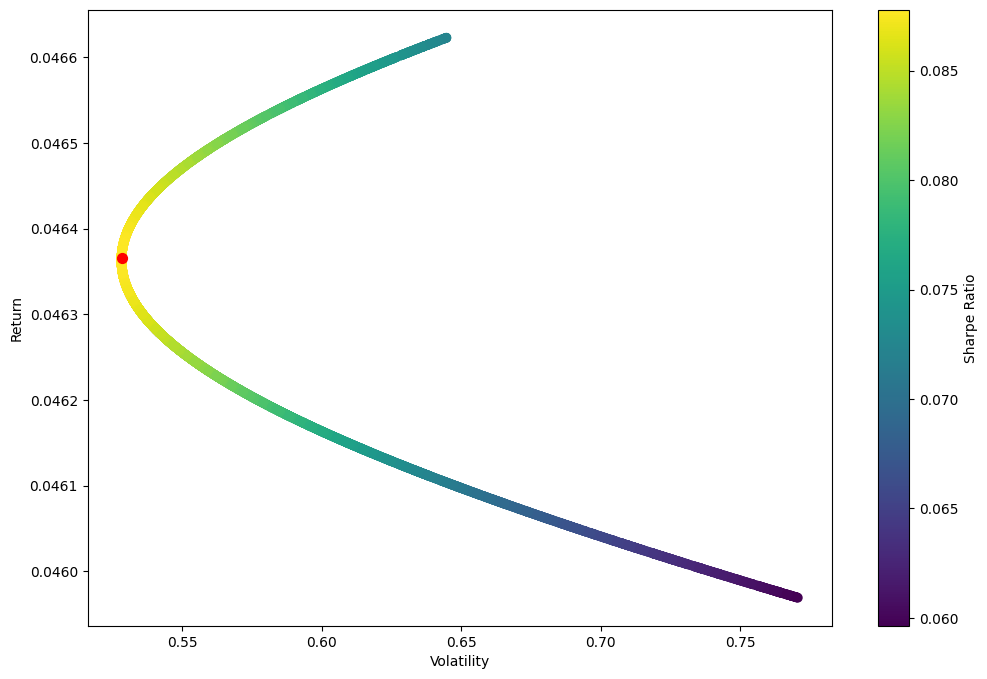

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(12,8))
plt.scatter(volatility_array, return_array, c=sharpe_array, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sharpe_vol, max_sharpe_ret, c='red', s=50) # red dot
plt.show()